# Importing requried Library

In [6]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [7]:
## Loading our dataset
df=pd.read_csv(r"C:\Users\SUBHASH CHANDRA PAL\Desktop\New folder\FLIP ROBO\smsspamcollection\SMSSpamCollection",sep='\t',names=['label','message'])

In [8]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
## getting the length of unclean data
df['unclean']= df['message'].apply(lambda x:len(x))

In [10]:
df

,label,message,unclean
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [11]:
## label encoder
df['label']=df.replace({'ham':0,'spam':1})

In [12]:
df

,label,message,unclean
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160
5568,0,Will ü b going to esplanade fr home?,36
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [16]:
## data cleaning
import re
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()
d=[]
for i in range (0,len(df)):
    check=re.sub('[^a-zA-z]',' ',df['message'][i])
    check=check.lower()
    check=check.split()
    stop_words=set(stopwords.words('english')+['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    check=[lemma.lemmatize(word,pos='v') for word in check if not word in stop_words]
    check=' '.join(check)
    d.append(check)
    

    

In [17]:
df['message']=d

In [18]:
df['clean']=df['message'].apply(lambda x:len(x))

In [19]:
df

,label,message,unclean,clean
0,0,go jurong point crazy available bugis n great ...,111,82
1,0,ok lar joke wif oni,29,19
2,1,free entry wkly comp win fa cup final tkts st ...,155,101
3,0,dun say early hor c already say,49,31
4,0,nah think go usf live around though,61,35
...,...,...,...,...
5567,1,nd time try contact pound prize claim easy cal...,160,77
5568,0,b go esplanade fr home,36,22
5569,0,pity mood suggestions,57,21
5570,0,guy bitch act like interest buy something else...,125,69


In [20]:
print('clean length',df['clean'].sum())
print('unclean lenght',df['unclean'].sum())

clean length 264396
unclean lenght 448490


C:\Users\SUBHASH CHANDRA PAL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SUBHASH CHANDRA PAL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribution of Spam Message'}, xlabel='clean', ylabel='Density'>

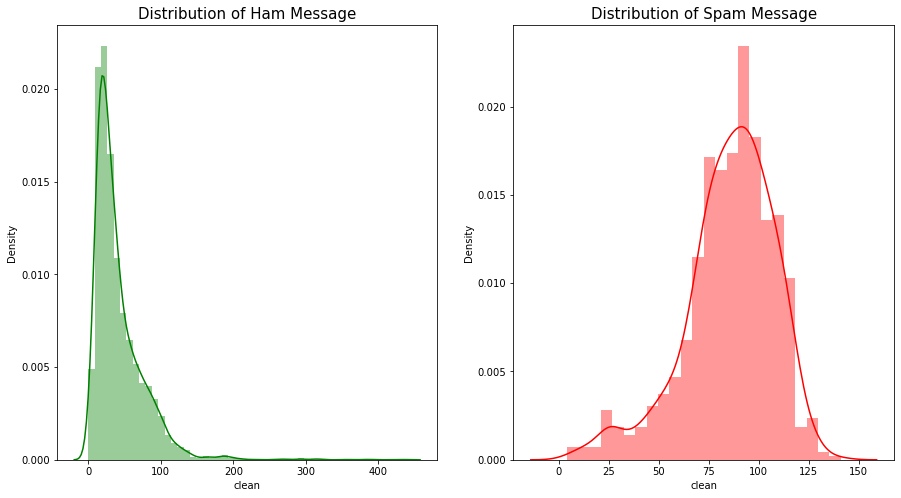

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Distribution of Ham Message',fontsize=15)
sns.distplot(df[df['label']==0]['clean'],color='g',label='Ham Message')

plt.subplot(1,2,2)
plt.title('Distribution of Spam Message',fontsize=15)
sns.distplot(df[df['label']==1]['clean'],color='r',label='Spam Message')

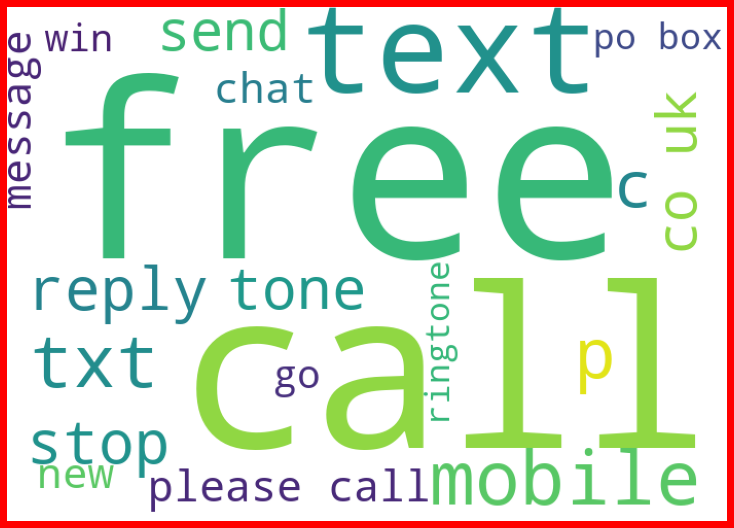

In [25]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


spams = df['message'][df['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

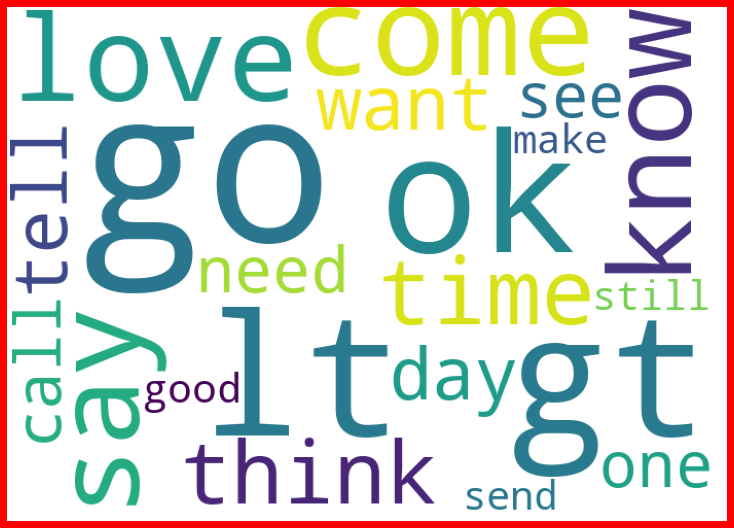

In [26]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


hams = df['message'][df['label']==0]

ham_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(hams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(ham_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.naive_bayes import MultinomialNB

In [28]:
tf=TfidfVectorizer()
naive=MultinomialNB()


In [29]:
features=tf.fit_transform(df['message'])

In [45]:
x=features
y=df['label']
y=y.astype('int')

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)
naive.fit(x_train,y_train)
pred=naive.predict(x_test)
print('Accuracy',accuracy_score(y_test,pred))
print("confusion matrix")
print(confusion_matrix(y_test,pred))
print('classification report')
print(classification_report(y_test,pred))


Accuracy 0.9605263157894737
confusion matrix
[[1448    0]
 [  66  158]]
classification report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1448
           1       1.00      0.71      0.83       224

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.96      1672



<AxesSubplot:>

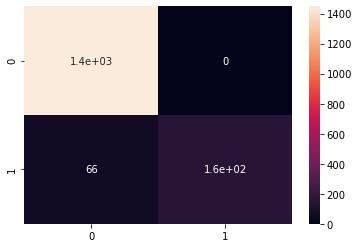

In [57]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)